<a href="https://colab.research.google.com/github/adventuresinML/adventures-in-ml-code/blob/master/Maximum_likelihood_estimation_and_TensorFlow_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pylab as plt
tfd = tfp.distributions

In [ ]:
x_range = np.arange(0, 10, 0.1)
grad = 2.0
intercept = 3.0
lin_reg = x_range * grad + np.random.normal(0, 3.0, len(x_range)) + intercept

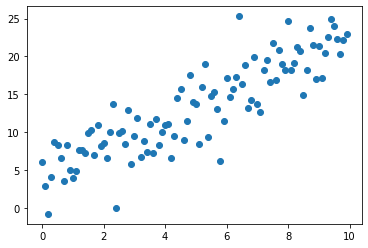

In [ ]:
plt.scatter(x_range, lin_reg)
plt.show()

In [ ]:
def neg_log_likelihood(y_actual, y_predict):
  return -y_predict.log_prob(y_actual)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(lambda x: tfd.Normal(loc=x, scale=1)),
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=neg_log_likelihood)
model.fit(x_range, lin_reg, epochs=500, verbose=False)

In [ ]:
yhat = model(x_range)

In [ ]:
mean = yhat.mean()

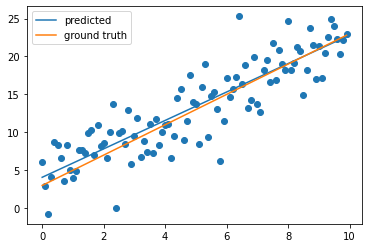

In [ ]:
plt.close("all")
plt.scatter(x_range, lin_reg)
plt.plot(x_range, mean, label='predicted')
plt.plot(x_range, x_range * grad + intercept, label='ground truth')
plt.legend(loc="upper left")
plt.show()

### Estimate std deviation also

In [ ]:
def noise(x, grad=0.5, const=2.0):
  return np.random.normal(0, grad * x + const)

In [ ]:
x_range = np.arange(0, 10, 0.1)
noise = np.array(list(map(noise, x_range)))
grad = 2.0
intercept = 3.0
lin_reg = x_range * grad + intercept + noise

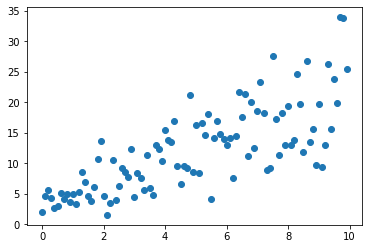

In [ ]:
plt.scatter(x_range, lin_reg)
plt.show()

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2),
  tfp.layers.DistributionLambda(lambda x: tfd.Normal(loc=x[:, 0], scale=1e-3 + tf.math.softplus(0.3 * x[:, 1]))),
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss=neg_log_likelihood)
model.fit(x_range, lin_reg, epochs=1000, verbose=False)

In [ ]:
yhat = model(x_range)

In [ ]:
mean = yhat.mean()
upper = mean + 2 * yhat.stddev()
lower = mean - 2 * yhat.stddev()

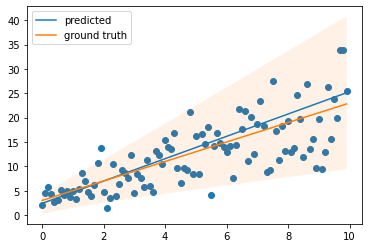

In [ ]:
plt.close("all")
plt.scatter(x_range, lin_reg)
plt.plot(x_range, mean, label='predicted')
plt.fill_between(x_range, lower, upper, alpha=0.1)
plt.plot(x_range, x_range * grad + intercept, label='ground truth')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.weights

[<tf.Variable 'dense_35/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[2.2931483, 2.4196053]], dtype=float32)>,
 <tf.Variable 'dense_35/bias:0' shape=(2,) dtype=float32, numpy=array([2.3962705, 2.2277684], dtype=float32)>]